<a href="https://colab.research.google.com/github/Denniskag/Computer-vision-exam/blob/main/Research_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Original data augmentation and loading
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Computer vision datasets/data_A/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Computer vision datasets/data_A/test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')



Found 5638 images belonging to 2 classes.
Found 1408 images belonging to 2 classes.


In [ ]:
# Define the original CNN model
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the original model
cnn.fit(x=training_set, validation_data=test_set, epochs=2)

Epoch 1/2
177/177 [==============================] - 4568s 26s/step - loss: 0.2881 - accuracy: 0.8879 - val_loss: 0.1495 - val_accuracy: 0.9553
Epoch 2/2
177/177 [==============================] - 30s 169ms/step - loss: 0.1419 - accuracy: 0.9548 - val_loss: 0.1385 - val_accuracy: 0.9581


In [ ]:
cnn.save('path/to/saved_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_set.reset()
predictions = cnn.predict(test_set)
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
true_classes = test_set.classes

44/44 [==============================] - 5s 106ms/step


In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix for Original Model")
print(cm)

Confusion Matrix for Original Model
[[682 293]
 [278 155]]


In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=['saloon_car', 'motorcycle'])
print("Classification Report for Original Model")
print(report)


Classification Report for Original Model
              precision    recall  f1-score   support

  saloon_car       0.71      0.70      0.70       975
  motorcycle       0.35      0.36      0.35       433

    accuracy                           0.59      1408
   macro avg       0.53      0.53      0.53      1408
weighted avg       0.60      0.59      0.60      1408



In [ ]:
fpr, tpr, thresholds = roc_curve(true_classes, predictions)
roc_auc = auc(fpr, tpr)
print("AUC for Original Model: ", roc_auc)


AUC for Original Model:  0.5469603837271274


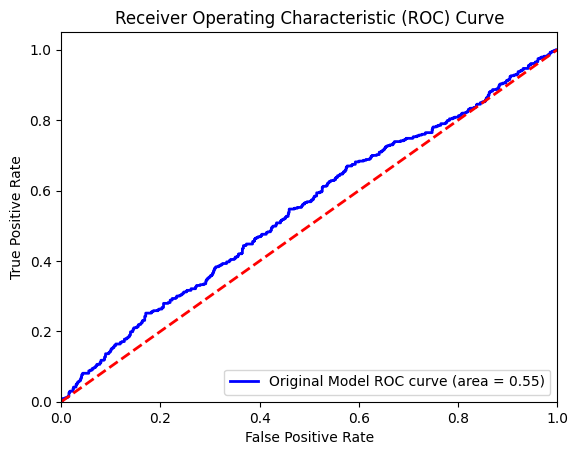

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Original Model ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")



In [18]:
def add_night_effect(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.multiply(v, 0.3)
    hsv = cv2.merge((h, s, v))
    night_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return night_image

def night_augmentation(image):
    image = add_night_effect(image)
    return image

In [19]:
# New data augmentation for night-time image processing
night_train_datagen = ImageDataGenerator(rescale=1./255,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True,
                                         preprocessing_function=night_augmentation)
                                         #brightness_range=[0.2, 1.0])

night_training_set = night_train_datagen.flow_from_directory('/content/drive/MyDrive/Computer vision datasets/data_A/train',
                                                             target_size=(64, 64),
                                                             batch_size=32,
                                                             class_mode='binary')

night_test_datagen = ImageDataGenerator(rescale=1./255)
night_test_set = night_test_datagen.flow_from_directory('/content/drive/MyDrive/Computer vision datasets/data_A/test',
                                                        target_size=(64, 64),
                                                        batch_size=32,
                                                        class_mode='binary')

Found 5638 images belonging to 2 classes.
Found 1408 images belonging to 2 classes.


In [20]:
night_cnn = tf.keras.models.Sequential()
night_cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
night_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
night_cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
night_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
night_cnn.add(tf.keras.layers.Flatten())
night_cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
night_cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
night_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


night_cnn.fit(x=night_training_set, validation_data=night_test_set, epochs=2)



Epoch 1/2
177/177 [==============================] - 75s 183ms/step - loss: 0.3175 - accuracy: 0.8620 - val_loss: 3.2297 - val_accuracy: 0.5014
Epoch 2/2
177/177 [==============================] - 32s 182ms/step - loss: 0.1485 - accuracy: 0.9526 - val_loss: 3.5749 - val_accuracy: 0.4538


In [21]:
night_test_set.reset()
night_predictions = night_cnn.predict(night_test_set)
night_predicted_classes = (night_predictions > 0.5).astype(int).reshape(-1)
night_true_classes = night_test_set.classes



44/44 [==============================] - 4s 99ms/step


In [22]:
# Compute confusion matrix for new model
night_cm = confusion_matrix(night_true_classes, night_predicted_classes)
print("Confusion Matrix for Night Model")
print(night_cm)


Confusion Matrix for Night Model
[[154 821]
 [ 58 375]]


In [23]:
# Compute classification report for new model
night_report = classification_report(night_true_classes, night_predicted_classes, target_names=['saloon_car', 'motorcycle'])
print("Classification Report for Night Model")
print(night_report)


Classification Report for Night Model
              precision    recall  f1-score   support

  saloon_car       0.73      0.16      0.26       975
  motorcycle       0.31      0.87      0.46       433

    accuracy                           0.38      1408
   macro avg       0.52      0.51      0.36      1408
weighted avg       0.60      0.38      0.32      1408



In [24]:
# Compute AUC for new model
night_fpr, night_tpr, night_thresholds = roc_curve(night_true_classes, night_predictions)
night_roc_auc = auc(night_fpr, night_tpr)
print("AUC for Night Model: ", night_roc_auc)


AUC for Night Model:  0.5120672706815894


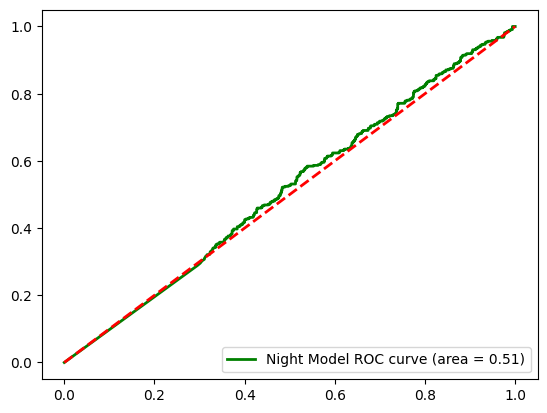

In [25]:
# Plotting the ROC curve for new model
plt.plot(night_fpr, night_tpr, color='green', lw=2, label='Night Model ROC curve (area = %0.2f)' % night_roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc="lower right")
plt.show()